In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
df = gpd.read_file('shapefiles/estadosl_2007.shp')
df = df[df['SIGLAUF3'] == 'SP']
df.crs = {'init': 'epsg:4326'}
polygon = df.geometry.values[0]

In [3]:
path = 'noaa-goes16/GLM-L2-LCFA/2019/297/'
hours = os.listdir(path)

data = {}
for hour in hours:
    files = os.listdir(os.path.join(path, hour))
    files = list(filter(lambda x: x.endswith('.nc'), files))
    files = [os.path.join(os.path.join(path, hour), file) for file in files]
    
    data[hour] =  {}
    data[hour]['lons'] = []
    data[hour]['lats'] = []
    
    for file in files:
        nc = Dataset(file, 'r')
        lons = nc.variables['flash_lon'][:]
        lats = nc.variables['flash_lat'][:]
        data[hour]['lons'].append(lons)
        data[hour]['lats'].append(lats)

In [4]:
data['00']['lons'][0]

masked_array(data=[ -66.76416 ,  -75.03172 ,  -28.622696, -100.035866,
                    -87.25772 ,  -61.53336 ,  -78.77627 ,  -58.208523,
                    -46.134754,  -75.0192  ,  -55.304226,  -88.68495 ,
                    -78.87617 ,  -62.01637 ,  -87.16621 ,  -43.662777,
                    -78.90118 ,  -86.99629 ,  -78.90339 ,  -84.65598 ,
                    -79.11212 ,  -48.01044 ,  -85.843094,  -92.49776 ,
                    -50.513096,  -46.746742,  -72.61159 ,  -78.096146,
                    -46.07199 ,  -61.572357,  -51.15749 ,  -78.697586,
                    -48.26911 ,  -74.54781 ,  -55.609795,  -67.65458 ,
                    -60.508575,  -77.44348 ,  -75.60993 ,  -78.80703 ,
                    -78.89412 ,  -45.228203,  -72.627174,  -86.62391 ,
                    -62.35867 ,  -73.25702 ,  -78.88474 ,  -61.684082,
                    -52.099594,  -78.67219 ,  -87.19758 ,  -75.507355,
                    -62.14648 ,  -90.46427 , -105.06519 ,  -98.17239 ,
      

In [5]:
spl = {}
spl['lon'] = []
spl['lat'] = []

for i in range(len(data['00']['lons'])):
    lons = data['00']['lons'][i]
    lats = data['00']['lats'][i]
    
    for lon in lons:
        for lat in lats:
            point = Point(lon, lat)
            if polygon.contains(point):
                spl['lon'].append(lon)
                spl['lat'].append(lat)
    

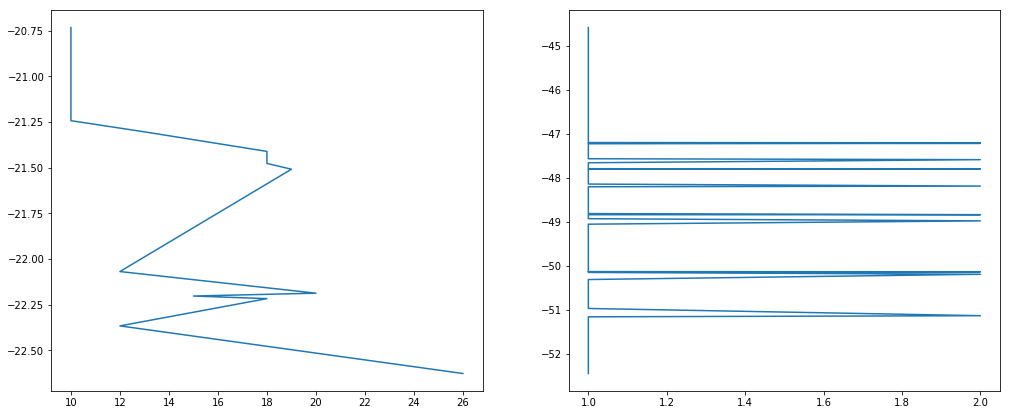

In [6]:
# a, b = np.min(spl['lat']), np.max(spl['lat'])
height = {}
width = {}
for lon, lat in zip(spl['lon'], spl['lat']):
    temp = list(filter(lambda v: v == lat, spl['lat']))
    height[lat] = len(temp)
    
    temp = list(filter(lambda v: v == lon, spl['lon']))
    width[lon] = len(temp)

fig, ax = plt.subplots(1, 2, figsize=(17, 7))
ax[0].plot([height[v] for v in sorted(height)], sorted(height), label='Freq. por Latitude')

ax[1].plot([width[v] for v in sorted(width)], sorted(width), label='Freq. por Longitude')

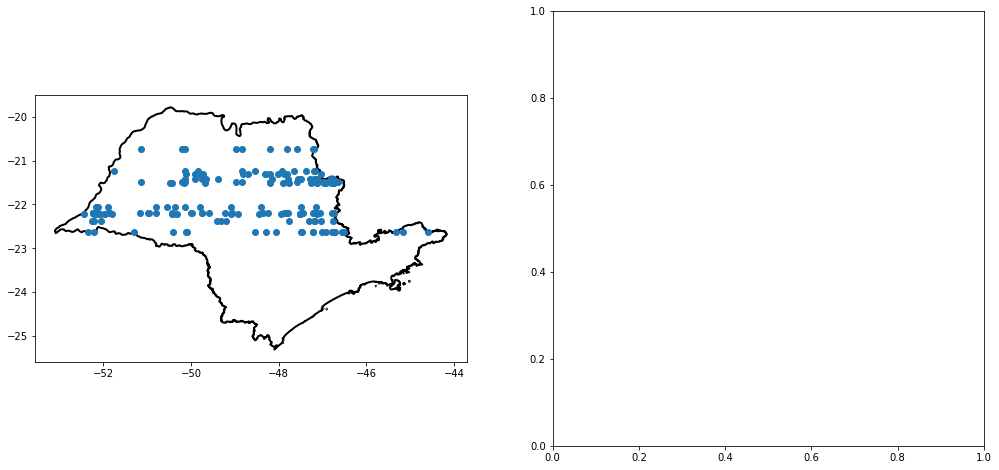

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(17, 8))

df.geometry.plot(ax=ax[0], facecolor='none', edgecolor='k', linewidth=2)
ax[0].scatter(spl['lon'], spl['lat'])
plt.show()